<a href="https://colab.research.google.com/github/ichacaca/UAS-AI/blob/main/FIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import pandas as pd #olah dan analisis data

In [ ]:
fifid = pd.read_csv('/content/sample_data/hamberman.csv')
fifid.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
fifid.drop(columns='status', inplace=True)
fifid.head()

,age,year,nodes
0,30,64,1
1,30,62,3
2,30,65,0
3,31,59,2
4,31,65,4


In [ ]:
fifid.shape

(306, 3)

In [ ]:
fifid.columns

Index(['age', 'year', 'nodes'], dtype='object')

In [ ]:
fifid.dtypes

age      int64
year     int64
nodes    int64
dtype: object

In [ ]:
fifid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
dtypes: int64(3)
memory usage: 7.3 KB


In [ ]:
fifid.isna().values.any()

False

In [ ]:
fifid[fifid.duplicated()]

,age,year,nodes
23,37,63,0
27,38,60,0
49,41,64,0
52,41,65,0
65,43,64,0
78,44,61,0
88,45,67,1
108,48,58,11
132,50,61,0
133,50,64,0


In [ ]:
fifid.duplicated().value_counts()

False    283
True      23
dtype: int64

In [ ]:
#menghapus data yang double
fifid.drop_duplicates(inplace=True)
#menampilkan banyaknya baris dan kolom
fifid.shape

(283, 3)

In [ ]:
#menampilkan deskriptif statistik data
fifid.describe()

,age,year,nodes
count,283.000000,283.000000,283.000000
mean,52.371025,62.936396,4.307420
std,10.890500,3.261018,7.378389
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.000000,66.000000,5.000000
max,83.000000,69.000000,52.000000


In [ ]:
#mengetahui korelasi antar kolom
fifid.corr()

,age,year,nodes
age,1.000000,0.112599,-0.059015
year,0.112599,1.000000,-0.010975
nodes,-0.059015,-0.010975,1.000000


In [ ]:
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#membagi dataset menjadi data training dan testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#mengambil data X yaitu Year
X = fifid.drop(columns='year')
X.head()

,age,nodes
0,30,1
1,30,3
2,30,0
3,31,2
4,31,4


In [ ]:
#mengambil data Y yaitu Year
y = fifid['year']
y.head()

0    64
1    62
2    65
3    59
4    65
Name: year, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)
print('training dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('testing dataset:')
print(X_train.shape)
print(y_train.shape)

training dataset
(169, 2)
(169,)

testing dataset:
(169, 2)
(169,)


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = list(range(1,26))
scores = []
for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(X_train, y_train)
  y_pred = model_knn.predict(X_test)
  scores.append(accuracy_score(y_test, y_pred))

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

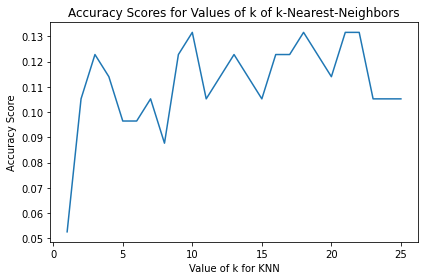

In [ ]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()

In [ ]:
print(accuracy_score(y_test, y_pred))

0.12280701754385964


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[5 3 3 2 1 2 0 0 1 0 0 0]
 [2 3 1 1 1 1 0 0 0 1 0 0]
 [3 4 0 2 0 0 0 0 2 0 0 0]
 [3 0 0 2 1 2 1 2 0 0 0 0]
 [1 3 1 0 2 1 0 1 0 0 0 0]
 [3 4 1 1 0 1 0 0 0 0 0 0]
 [1 3 2 2 0 2 0 0 1 0 0 0]
 [3 3 1 0 2 0 0 0 0 0 0 0]
 [3 1 1 0 2 0 0 0 1 0 0 0]
 [3 0 2 1 0 1 0 0 1 0 0 0]
 [3 0 0 0 0 0 0 0 1 0 0 0]
 [1 4 0 0 0 1 0 0 0 0 0 0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          58       0.16      0.29      0.21        17
          59       0.11      0.30      0.16        10
          60       0.00      0.00      0.00        11
          61       0.18      0.18      0.18        11
          62       0.22      0.22      0.22         9
          63       0.09      0.10      0.10        10
          64       0.00      0.00      0.00        11
          65       0.00      0.00      0.00         9
          66       0.14      0.12      0.13         8
          67       0.00      0.00      0.00         8
          68       0.00      0.00      0.00         4
          69       0.00      0.00      0.00         6

    accuracy                           0.12       114
   macro avg       0.08      0.10      0.08       114
weighted avg       0.09      0.12      0.10       114



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train,y_train)
y_pred = model_logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_test, y_pred))

0.08771929824561403


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[0 0 5 0 1 0 0 2 3 5 1 0]
 [0 0 4 0 0 0 0 3 2 1 0 0]
 [0 0 4 0 0 0 0 1 3 3 0 0]
 [0 1 0 0 0 1 0 3 1 5 0 0]
 [0 1 2 0 0 0 0 3 1 1 1 0]
 [0 0 2 0 0 0 0 3 3 2 0 0]
 [0 1 3 0 0 0 0 3 0 4 0 0]
 [0 0 2 0 1 0 0 0 2 3 1 0]
 [0 1 0 0 0 0 0 1 3 3 0 0]
 [0 1 1 0 1 0 0 2 0 3 0 0]
 [0 0 0 0 1 0 0 0 1 2 0 0]
 [0 0 2 0 0 0 0 2 2 0 0 0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          58       0.00      0.00      0.00        17
          59       0.00      0.00      0.00        10
          60       0.16      0.36      0.22        11
          61       0.00      0.00      0.00        11
          62       0.00      0.00      0.00         9
          63       0.00      0.00      0.00        10
          64       0.00      0.00      0.00        11
          65       0.00      0.00      0.00         9
          66       0.14      0.38      0.21         8
          67       0.09      0.38      0.15         8
          68       0.00      0.00      0.00         4
          69       0.00      0.00      0.00         6

    accuracy                           0.09       114
   macro avg       0.03      0.09      0.05       114
weighted avg       0.03      0.09      0.05       114



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#SVC
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.09649122807017543


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 0  0  2  0  0  1  0  0 14  0  0  0]
 [ 0  0  2  0  0  0  0  3  5  0  0  0]
 [ 0  0  3  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  2  9  0  0  0]
 [ 0  0  2  0  0  0  0  2  5  0  0  0]
 [ 0  0  2  0  0  1  0  1  6  0  0  0]
 [ 0  0  1  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  1  7  0  0  0]
 [ 0  0  0  0  0  0  0  1  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  1  5  0  0  0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          58       0.00      0.00      0.00        17
          59       0.00      0.00      0.00        10
          60       0.23      0.27      0.25        11
          61       0.00      0.00      0.00        11
          62       0.00      0.00      0.00         9
          63       0.50      0.10      0.17        10
          64       0.00      0.00      0.00        11
          65       0.00      0.00      0.00         9
          66       0.08      0.88      0.15         8
          67       0.00      0.00      0.00         8
          68       0.00      0.00      0.00         4
          69       0.00      0.00      0.00         6

    accuracy                           0.10       114
   macro avg       0.07      0.10      0.05       114
weighted avg       0.07      0.10      0.05       114



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Decision Tree Classifier (DT)
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.03508771929824561


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[0 4 2 2 3 3 0 0 1 2 0 0]
 [1 0 1 0 3 3 0 0 0 2 0 0]
 [0 3 0 3 0 0 0 2 3 0 0 0]
 [1 1 0 1 2 1 1 2 1 1 0 0]
 [0 2 1 0 0 2 0 2 0 0 1 1]
 [2 2 1 2 1 0 0 1 0 0 0 1]
 [0 2 3 2 0 1 1 1 1 0 0 0]
 [1 2 2 0 1 0 0 1 2 0 0 0]
 [1 1 1 1 1 0 1 1 1 0 0 0]
 [1 3 1 0 0 1 0 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 0 1 0 0]
 [0 2 1 0 2 0 0 1 0 0 0 0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          58       0.00      0.00      0.00        17
          59       0.00      0.00      0.00        10
          60       0.00      0.00      0.00        11
          61       0.09      0.09      0.09        11
          62       0.00      0.00      0.00         9
          63       0.00      0.00      0.00        10
          64       0.33      0.09      0.14        11
          65       0.08      0.11      0.10         9
          66       0.10      0.12      0.11         8
          67       0.00      0.00      0.00         8
          68       0.00      0.00      0.00         4
          69       0.00      0.00      0.00         6

    accuracy                           0.04       114
   macro avg       0.05      0.03      0.04       114
weighted avg       0.05      0.04      0.04       114



In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.03508771929824561


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[0 4 2 2 3 3 0 0 1 2 0 0]
 [1 0 1 0 3 3 0 0 0 2 0 0]
 [0 3 0 3 0 0 0 2 3 0 0 0]
 [1 1 0 1 2 1 1 2 1 1 0 0]
 [0 2 1 0 0 2 0 2 0 0 1 1]
 [2 2 1 2 1 0 0 1 0 0 0 1]
 [0 2 3 2 0 1 1 1 1 0 0 0]
 [1 2 2 0 1 0 0 1 2 0 0 0]
 [1 1 1 1 1 0 1 1 1 0 0 0]
 [1 3 1 0 0 1 0 1 1 0 0 0]
 [1 1 1 0 0 0 0 0 0 1 0 0]
 [0 2 1 0 2 0 0 1 0 0 0 0]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          58       0.00      0.00      0.00        17
          59       0.00      0.00      0.00        10
          60       0.00      0.00      0.00        11
          61       0.09      0.09      0.09        11
          62       0.00      0.00      0.00         9
          63       0.00      0.00      0.00        10
          64       0.33      0.09      0.14        11
          65       0.08      0.11      0.10         9
          66       0.10      0.12      0.11         8
          67       0.00      0.00      0.00         8
          68       0.00      0.00      0.00         4
          69       0.00      0.00      0.00         6

    accuracy                           0.04       114
   macro avg       0.05      0.03      0.04       114
weighted avg       0.05      0.04      0.04       114



In [ ]:
models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)

print(accuracy_scores)

[0.12280701754385964, 0.08771929824561403, 0.09649122807017543, 0.03508771929824561, 0.06140350877192982]


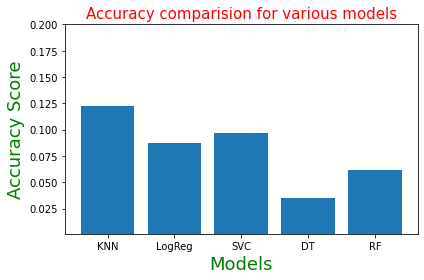

In [ ]:
plt.bar(['KNN', 'LogReg', 'SVC', 'DT','RF'],accuracy_scores)
plt.ylim(0.001,0.2)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()